In [3]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score, silhouette_samples
import numpy as np

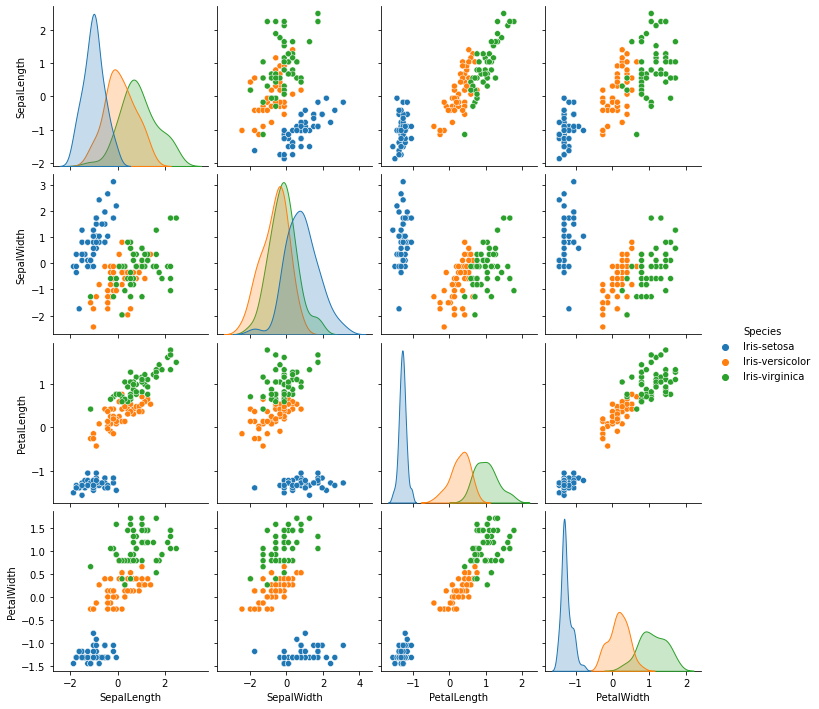

In [4]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", names = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species'])
# standardize the data to have a mean of zero and a standard deviation of one
df.iloc[:,:4] = StandardScaler().fit_transform(df.iloc[:,:4])
# Exploratory Data Analysis
sns.pairplot(df, hue="Species", diag_kind= 'kde')

In [19]:
x = df.iloc[:,:4]

In [20]:
x

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


In [23]:
x.info

<bound method DataFrame.info of      SepalLength  SepalWidth  PetalLength  PetalWidth
0      -0.900681    1.032057    -1.341272   -1.312977
1      -1.143017   -0.124958    -1.341272   -1.312977
2      -1.385353    0.337848    -1.398138   -1.312977
3      -1.506521    0.106445    -1.284407   -1.312977
4      -1.021849    1.263460    -1.341272   -1.312977
..           ...         ...          ...         ...
145     1.038005   -0.124958     0.819624    1.447956
146     0.553333   -1.281972     0.705893    0.922064
147     0.795669   -0.124958     0.819624    1.053537
148     0.432165    0.800654     0.933356    1.447956
149     0.068662   -0.124958     0.762759    0.790591

[150 rows x 4 columns]>

In [22]:
sse, db, slc = {}, {}, {}
for k in range(2, 10):
    kmeans = KMeans(n_clusters = k, max_iter = 1000, n_init = 10, init = 'k-means++', random_state=123).fit(x)
    clusters = kmeans.labels_
    sse[k] = kmeans.inertia_
    db[k] = davies_bouldin_score(x, clusters)
    slc[k] = silhouette_score(x, clusters)

C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have

In [10]:
sse

{2: 223.73200573676345,
 3: 140.96581663074699,
 4: 114.57790500611006,
 5: 91.2578427971818,
 6: 80.2121204122833,
 7: 72.00548943432356,
 8: 63.01085611519521,
 9: 55.79765130681996}

Elbow Method: In Figure 3, we have a plot of SSE with the number of clusters. This plot suggests that the elbow is formed with K value around 3–5. After K=5, the SSE starts decreasing slowly.

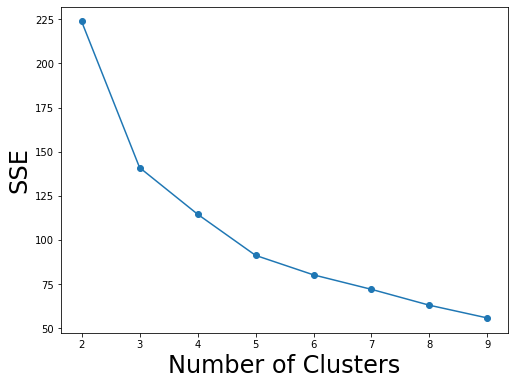

In [8]:
plt.figure(figsize=(8, 6))
plt.plot(list(sse.keys()), list(sse.values()), marker='o')
plt.xlabel('Number of Clusters', fontsize=24)
plt.ylabel('SSE', fontsize=24)
plt.show()

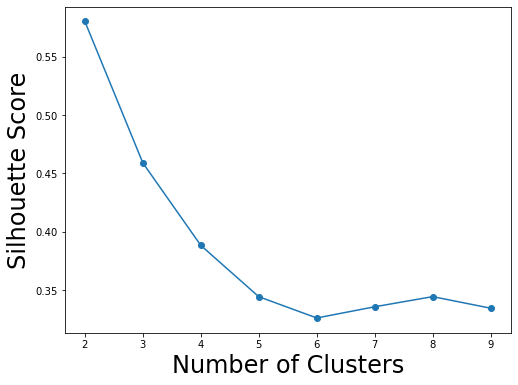

In [11]:
plt.figure(figsize=(8, 6))
plt.plot(list(slc.keys()), list(slc.values()), marker='o')
plt.xlabel('Number of Clusters', fontsize=24)
plt.ylabel('Silhouette Score', fontsize=24)
plt.show()

Silhouette Analysis: In Figure 4, we have a plot of Silhouette index with the number of clusters. This plot suggests high Silhouette index appears at lower K value(e.g., 3, 4).

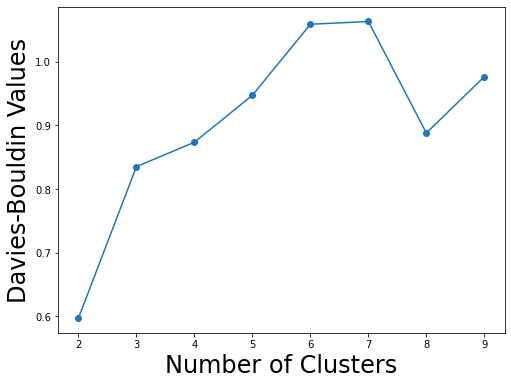

In [12]:
plt.figure(figsize=(8, 6))
plt.plot(list(db.keys()), list(db.values()), marker='o')
plt.xlabel('Number of Clusters', fontsize=24)
plt.ylabel('Davies-Bouldin Values', fontsize=24)
plt.show()

Davies-Bouldin Index: In Figure 5, we have plot of Davies-Bouldin Index with the number of clusters. This plot also suggests low Davies-Bouldin Index appears at lower K value (e.g., 2, 3).

 3 seems to be the optimal K value for K-Means clustering. Finally, let’s produce the K-Means outputs using K=3. 

In [7]:
x

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 0.98, 'Predicted Clusters')

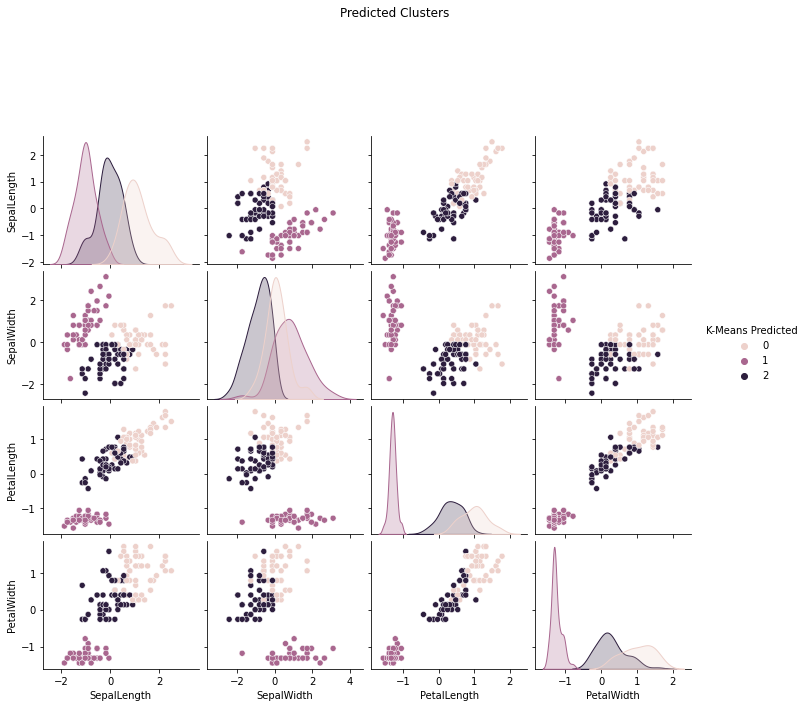

In [16]:
kmeans = KMeans(n_clusters = 3, max_iter = 1000, n_init = 10, init = 'k-means++', random_state=123).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters
rel = sns.pairplot(x, hue="K-Means Predicted", diag_kind= 'kde')
#add overall title
rel.fig.subplots_adjust(top=.8)
rel.fig.suptitle('Predicted Clusters')

# Compared to k-means with 3 clusters results are identical with the label data we have, for demonstration purposes K-means works very well to cluster unlabeled data. 

Text(0.5, 0.98, 'Actual Clusters')

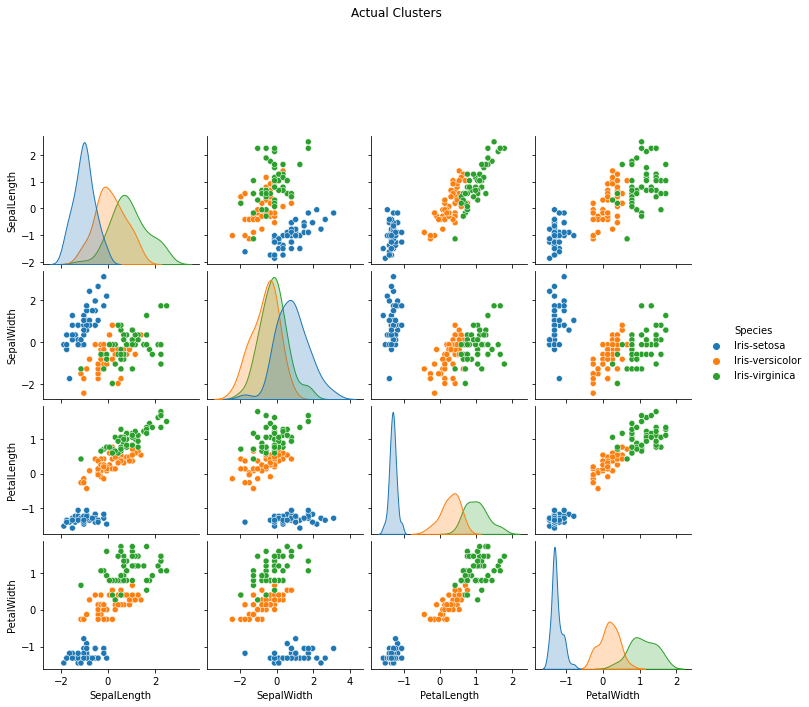

In [18]:
rel = sns.pairplot(df, hue="Species", diag_kind= 'kde')
#add overall title
rel.fig.subplots_adjust(top=.8)
rel.fig.suptitle('Actual Clusters')